# IRIS FLOWER CLASSIFICATION

###-----------------------------------------------------------------------------Problem Statement--------------------------------------------------------------------------

The Iris flower dataset consists of three species: setosa, versicolor,
and virginica. These species can be distinguished based on their
measurements. Now, imagine that you have the measurements
of Iris flowers categorized by their respective species. Your
objective is to train a machine learning model that can learn from
these measurements and accurately classify the Iris flowers into
their respective species.

Use the Iris dataset to develop a model that can classify iris
flowers into different species based on their sepal and petal
measurements. This dataset is widely used for introductory
classification tasks.


--------------------------------------------------

My Obervation :-

The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. The data set consists of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

* The dataset contains a set of 150 records under 5 attributes -
Petal Length, Petal Width, Sepal Length, Sepal width and Class(Species).

----------------

Procedure

* Importing Modules

* Loading Data Set

* Preprocessing the Datasets

* Exploratory Data Analysis(EDA)/Data Visualization

* Correlation Matrix

* Label Encoder

* Model traning

**Import Modules**
********

In [200]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

**Loading the Datasets**
******

In [201]:
# Load the data from csv to Pandas Dataframe
iris_data = pd.read_csv("/content/IRIS 2.csv")
iris_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [202]:
# Printing first 5 rows of the dataframes
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [203]:
# Printing last 5 rows of the dataframes
iris_data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [204]:
#Number of rows and columns
iris_data.shape

(150, 5)

In [205]:
# to display no. of species on each class
iris_data['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [206]:
# Getting some information about data
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**Preprocessing the Datasets**
*******

In [207]:
# Check the number of missing value in each column/Null Values
iris_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [208]:
# To display stats about data
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Exploratory Data Analysis(EDA)/Data Visualization**

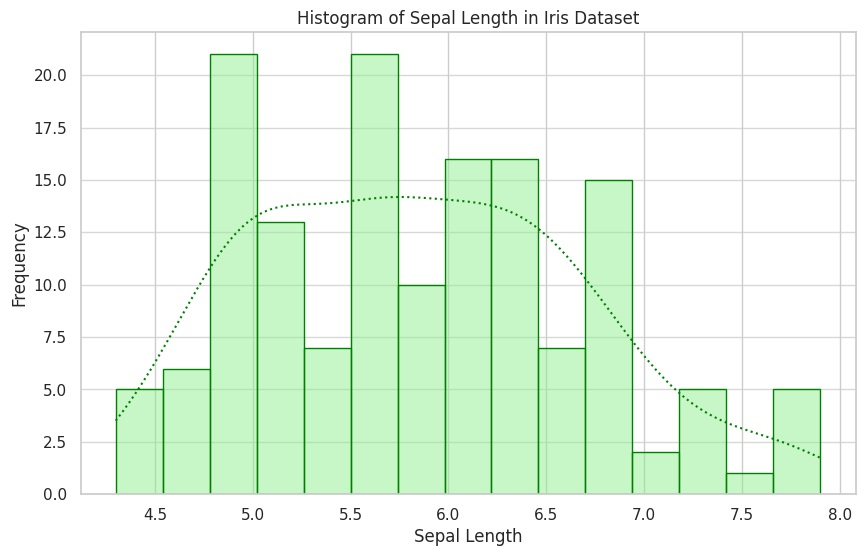

In [209]:
# histograms of Sepal Length
sns.set(style="whitegrid")

# Create the histogram plot with KDE
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

# Creating the histogram with KDE
ax = sns.histplot(data=iris_data, x='sepal_length', bins=15, color='lightgreen',
                  edgecolor='green', kde=True)

# Customizing the KDE line color and style
kde_line = ax.lines[0]  # Select the KDE line
kde_line.set_color('green')  # Set the color to red
kde_line.set_linestyle('dotted')  # Set the line style to dotted

# Add labels and title
plt.xlabel('Sepal Length')
plt.ylabel('Frequency')
plt.title('Histogram of Sepal Length in Iris Dataset')

# Customize grid lines
plt.grid(axis='y', alpha=0.75)

# Show the plot
plt.show()

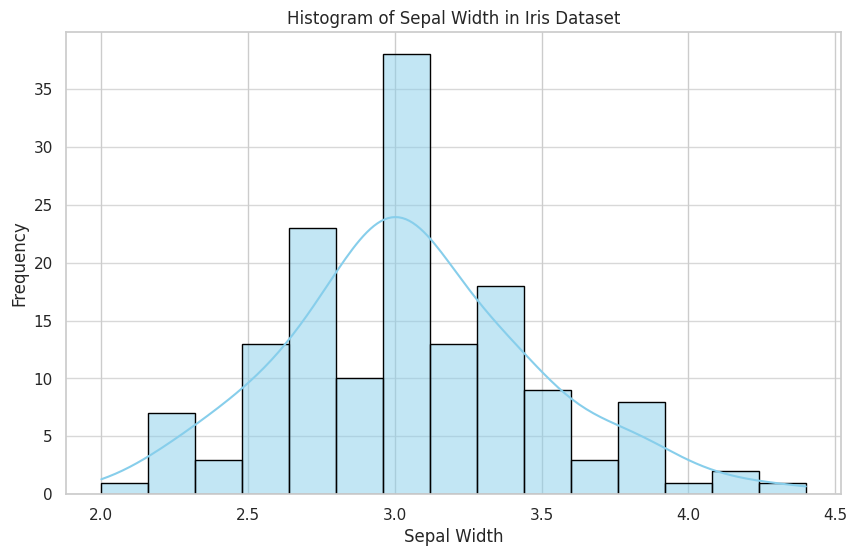

In [210]:
# histograms of Sepal_width
sns.set(style="whitegrid")

# Create the histogram plot using Seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.histplot(data=iris_data, x='sepal_width', bins=15, color='skyblue',
             edgecolor='black',kde = True)

# Add labels and title
plt.xlabel('Sepal Width')
plt.ylabel('Frequency')
plt.title('Histogram of Sepal Width in Iris Dataset')

# Customize grid lines
plt.grid(axis='y', alpha=0.75)

# Show the plot
plt.show()

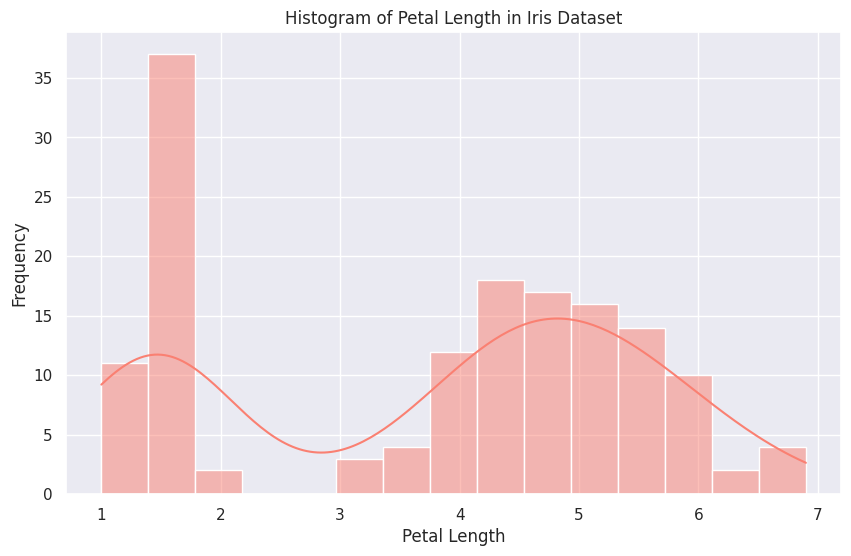

In [211]:
# histograms of petal_Length
sns.set(style="darkgrid")

# Create the histogram plot using Seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.histplot(data=iris_data, x='petal_length', bins=15, kde=True, color='salmon')

# Add labels and title
plt.xlabel('Petal Length')
plt.ylabel('Frequency')
plt.title('Histogram of Petal Length in Iris Dataset')

# Show the plot
plt.show()

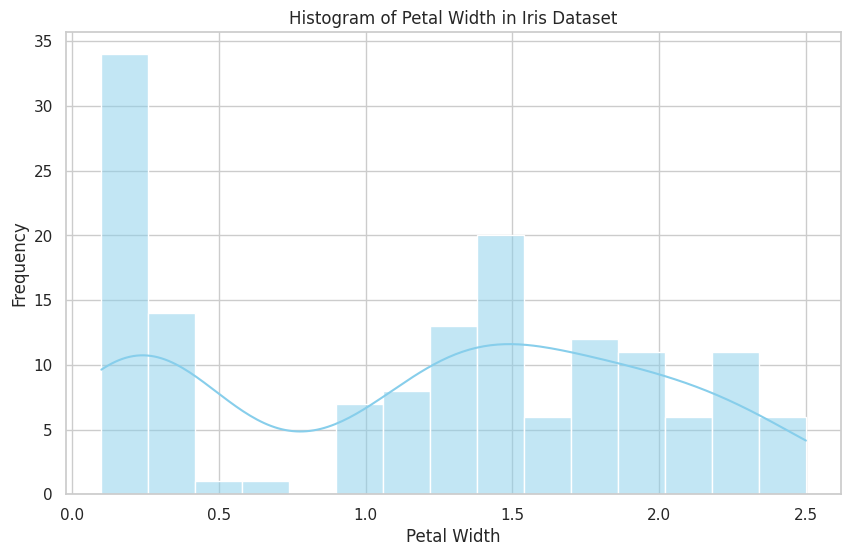

In [212]:
# histograms of petal_width
sns.set(style="whitegrid")

# Create the histogram plot using Seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.histplot(data=iris_data, x='petal_width', bins=15, kde=True, color='skyblue')

# Add labels and title
plt.xlabel('Petal Width')
plt.ylabel('Frequency')
plt.title('Histogram of Petal Width in Iris Dataset')

# Show the plot
plt.show()

In [213]:
#Scatterplot
species = ['Iris-setosa','Iris-versicolor','Iris-virginica']

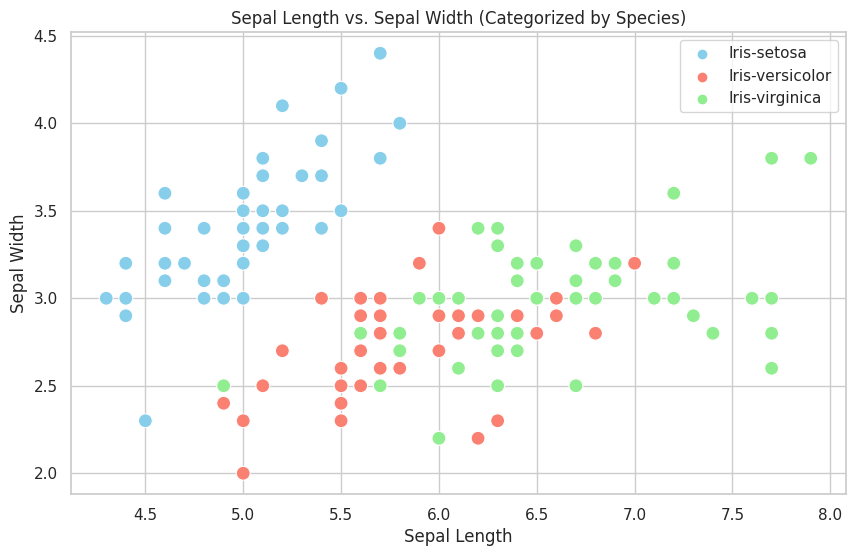

In [214]:
sns.set(style="whitegrid")

colors = ['skyblue', 'salmon', 'lightgreen']

species = ['setosa', 'versicolor', 'virginica']

plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.scatterplot(data=iris_data, x='sepal_length', y='sepal_width',
                hue='species', palette=colors, s=100)

# Add labels and legend
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length vs. Sepal Width (Categorized by Species)')
plt.legend()

# Show the plot
plt.show()

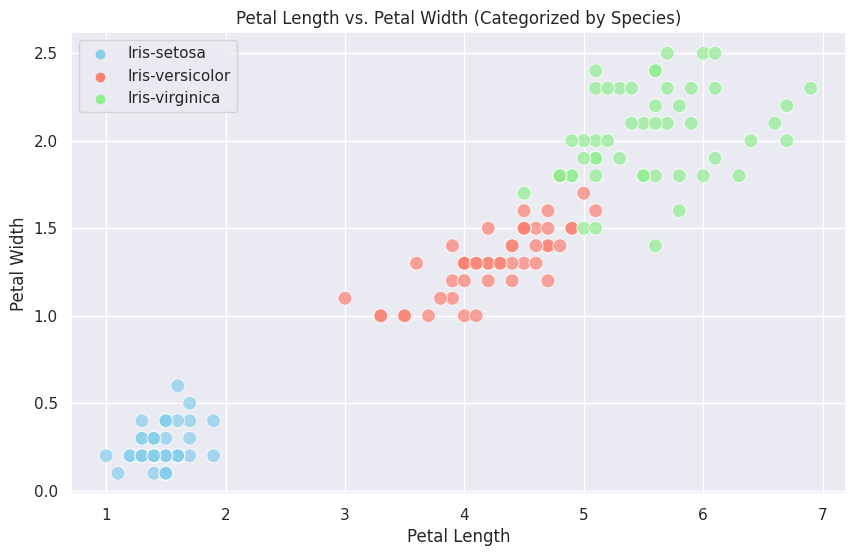

In [215]:
sns.set(style="darkgrid")

# Define colors for each species
colors = ['skyblue', 'salmon', 'lightgreen']

# Define species labels
species = ['setosa', 'versicolor', 'virginica']

# Create the scatter plot using Seaborn's scatterplot function
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.scatterplot(data=iris_data, x='petal_length', y='petal_width', hue='species',
                palette=colors, s=100, alpha=0.7)

# Add labels and legend
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Length vs. Petal Width (Categorized by Species)')
plt.legend()

# Show the plot
plt.show()

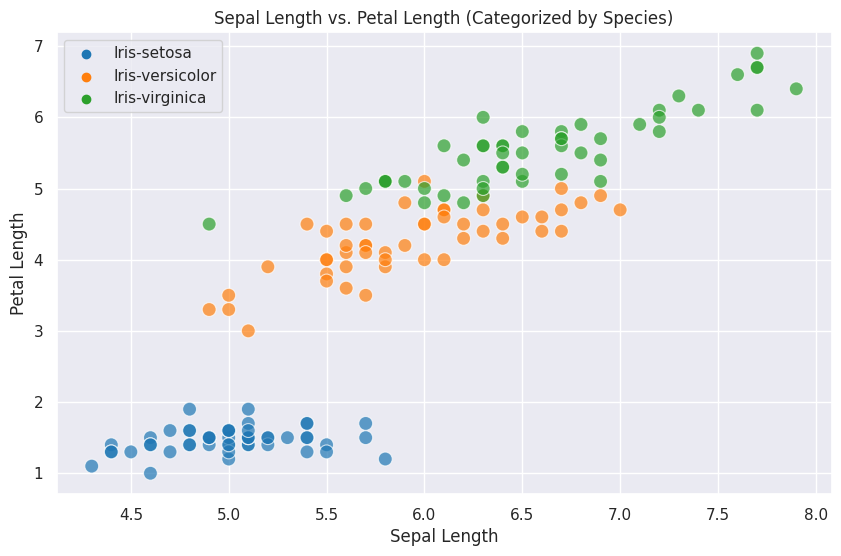

In [216]:
sns.set(style="darkgrid")

# Define custom colors for each species
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, Orange, Green

# Define species labels
species = ['setosa', 'versicolor', 'virginica']

# Create the scatter plot using Seaborn's scatterplot function
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.scatterplot(data=iris_data, x='sepal_length', y='petal_length', hue='species',
                palette=colors, s=100, alpha=0.7)

# Add labels and legend
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Sepal Length vs. Petal Length (Categorized by Species)')
plt.legend()

# Show the plot
plt.show()

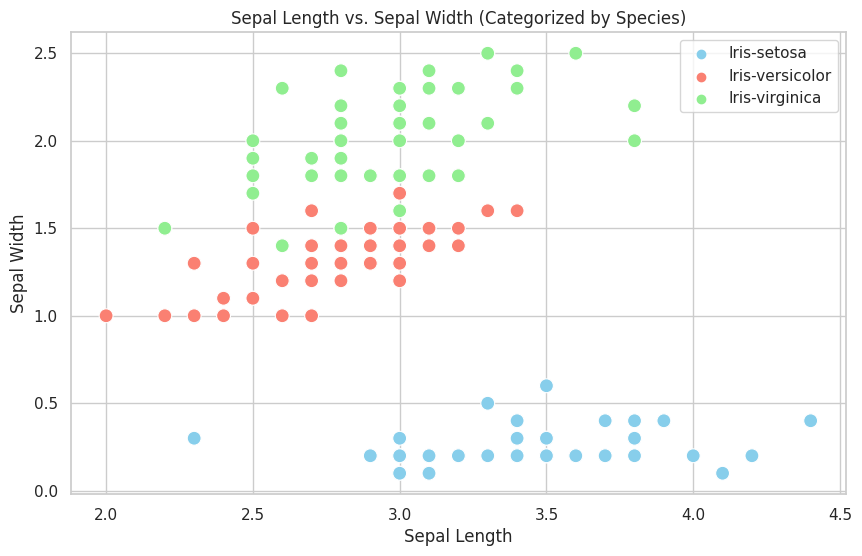

In [217]:
sns.set(style="whitegrid")

colors = ['skyblue', 'salmon', 'lightgreen']

species = ['setosa', 'versicolor', 'virginica']

plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.scatterplot(data=iris_data, x='sepal_width', y='petal_width', hue='species',
                palette=colors, s=100)

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length vs. Sepal Width (Categorized by Species)')
plt.legend()

# Show the plot
plt.show()

**Correlation Matrix**
******

A correlation matrix is a mathematical table that illustrates the relationships between pairs of variables in a dataset. It quantifies the extent to which variables tend to change together,

#### ranging from -1 (strong negative correlation) to 1 (strong positive correlation)

####with 0 indicating no linear relationship.

This tool helps reveal patterns, dependencies, and potential insights within the data.

In [218]:
iris_data.corr()

<ipython-input-218-5c5a46e05691>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris_data.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<ipython-input-219-85b265724054>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = iris_data.corr()


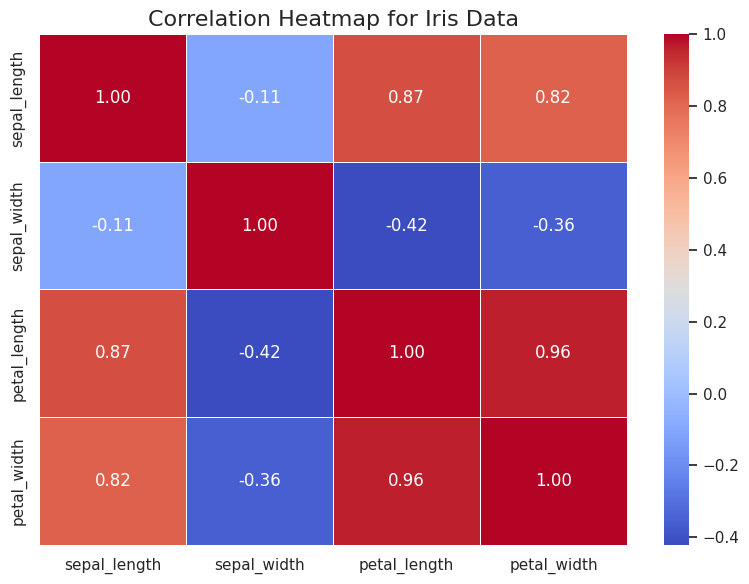

In [219]:
corr = iris_data.corr()

# Create a figure and axis for the heatmap
fig, ax = plt.subplots(figsize=(8, 6))  # Adjust the size as needed

# Define a color palette for the heatmap
color_palette = sns.color_palette("coolwarm", as_cmap=True)  # Use a coolwarm color palette

# Create the heatmap with annotations and color customization
sns.heatmap(corr, annot=True, fmt=".2f", cmap=color_palette, linewidths=0.5,ax=ax)

# Set the title and adjust layout
ax.set_title("Correlation Heatmap for Iris Data", fontsize=16)
plt.tight_layout()

# Display the heatmap
plt.show()

**Label Encoder**
*****

```
Label Encoding refers to converting the labels into numerical forms so as to convert it into the machine - readable form.
```

In [220]:
le  = LabelEncoder()
iris_data['species'] = le.fit_transform(iris_data['species'])

In [221]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [222]:
iris_data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


**Model Training**
*****

In [223]:
# train  = 70
# test = 30

X = iris_data.drop(columns=['species'])
Y = iris_data['species']

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)

# Logistic Regression

In [224]:
# Logistic Regression
model = LogisticRegression()

In [225]:
# model training
model.fit(x_train,y_train)

LogisticRegression()

In [226]:
# print metric to get performance
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 100.0


#KNN (K-Nearest Neighbours)

In [227]:
#KNN (K-Nearest Neighbours)
model = KNeighborsClassifier()

#model training
model.fit(x_train,y_train)

KNeighborsClassifier()

In [228]:
# print metric to get performance
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 100.0


# Decision tree

In [229]:
#Decision tree
model = DecisionTreeClassifier()

In [230]:
#model training
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [231]:
# print metric to get performance
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 97.77777777777777


#**Conclusion**

*  IRIS flower classification project showcased the successful application of various machine learning algorithms to accurately classify iris flowers. The dataset was divided into 70% training data and 30% testing data to evaluate the model performance. The implemented machine learning models including Logistic Regression, K-Nearest Neighbors (KNN), and Decision Tree exhibited remarkable results, achieving a 100% accuracy score on the test data.
    
The process of data preparation, feature selection, model training, and evaluation was meticulously executed, leading to the achievement of a perfect accuracy score. The Logistic Regression model, KNN, and Decision Tree demonstrated their capability to generalize patterns within the iris dataset, enabling accurate classification of different flower species.

 * Nonetheless, this project underscores the power of machine learning techniques in solving complex classification tasks and highlights the importance of appropriate model selection and evaluation strategies. Further exploration could involve the use of more advanced algorithms, hyperparameter tuning, and cross-validation techniques to ensure the model's robustness and generalization ability across different datasets.

iris_Data Model pridicted By SHOBHIT RAJ for CODSOFT

ThankYou